<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/AprendizadoMaquina/T%C3%B3pico%2002%20-%20Aprendizado%20Supervisionado/07%20Ensembles/T%C3%B3pico%2002%20-%20Aprendizado-Supervisionado%20-%20Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criação do dataset sintético

(3000, 50) (3000,)
(array([0, 1, 2]), array([1597,  849,  554]))


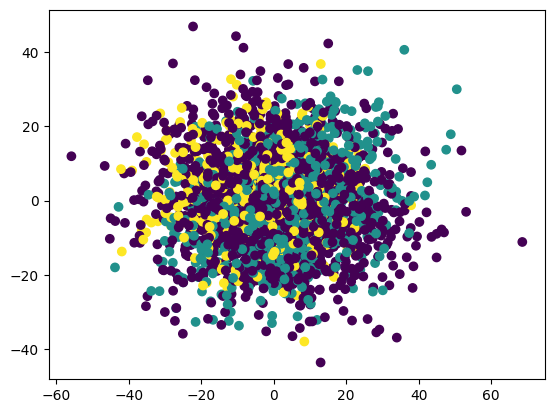

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
# define dataset
class_weights = [0.5,0.25,0.15]
X, y = make_classification(n_samples=3000, n_classes=3, n_features=50, n_informative=25, n_redundant=10,
                           n_clusters_per_class=1, class_sep=1.2, weights = class_weights, random_state=12)



#Reduzindo para 2 features para visualização
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)


print(X.shape, y.shape)
print(np.unique(y,return_counts=True))
plt.plot(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

#Desempenho com diversos classificadores individuais

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(C=1.0,kernel='rbf')
mlp = MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=2000, random_state=70)

for model,model_name in zip([nb,dt,svm,mlp],['Naive Bayes','Decision Tree','SVM','MLP']):

  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  print(model_name, accuracy_score(y_test,preds))
  print(classification_report(y_test,preds))

  print("######################################")

clf_global = nb

Naive Bayes 0.835
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       329
           1       0.82      0.82      0.82       168
           2       0.71      0.77      0.74       103

    accuracy                           0.83       600
   macro avg       0.81      0.82      0.81       600
weighted avg       0.84      0.83      0.84       600

######################################
Decision Tree 0.7683333333333333
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       329
           1       0.75      0.70      0.72       168
           2       0.66      0.64      0.65       103

    accuracy                           0.77       600
   macro avg       0.74      0.73      0.73       600
weighted avg       0.77      0.77      0.77       600

######################################
SVM 0.9683333333333334
              precision    recall  f1-score   support

           0       0.98      0.

#Treinar N classificadores, gera diversidade?

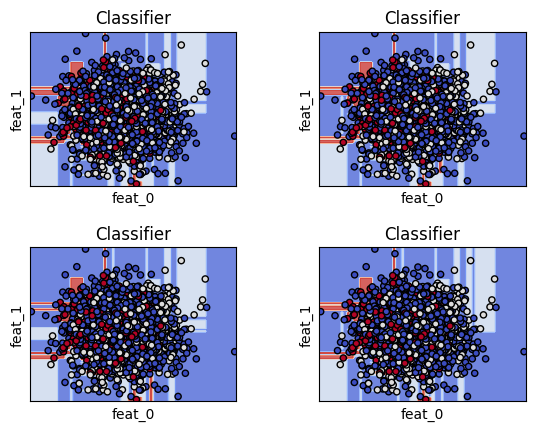

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay
clfs =[]

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(0,4):
  seed = np.random.randint(0,200)
  #clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=2000, random_state=20))
  clfs.append(DecisionTreeClassifier(criterion='entropy'))
  #clfs.append(SVC(C=1.0,kernel='rbf'))

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

for model,ax in zip(clfs,sub.flatten()):

  model.fit(X_train_pca, y_train)

  X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]

  disp = DecisionBoundaryDisplay.from_estimator(
      model,
      X_train_pca,
      response_method="predict",
      cmap=plt.cm.coolwarm,
      alpha=0.8,
      ax=ax,
      xlabel='feat_0',
      ylabel='feat_1',
  )

  ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title('Classifier')

plt.show()

#Diversidade a partir de diferentes atributos (Random Subspace)

Implementação de Exemplo (From scratch)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay
clfs =[]


for i in range(0,4):
  seed = np.random.randint(0,200)
  #clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=2000, random_state=20))
  clfs.append(DecisionTreeClassifier(random_state=20))

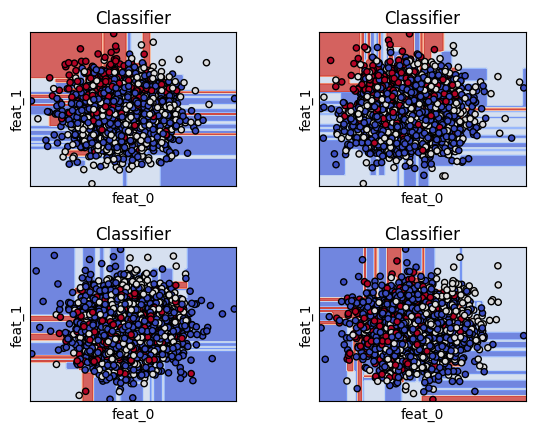

In [ ]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for model,ax in zip(clfs,sub.flatten()):
  num_cols = X_train.shape[1]

  # Generate a random permutation of the column indices
  perm = np.random.permutation(num_cols)

  # Reorder the columns based on the permutation
  X_train_ = X_train[:, perm]
  X_test_ = X_test[:, perm]

  #Seleciona parte das caracteristicas
  X_train_ = X_train_[:,:35]
  X_test_ = X_test_[:,:35]

  pca = PCA(n_components=2)
  pca.fit(X_train_)
  X_train_pca = pca.transform(X_train_)

  model.fit(X_train_pca, y_train)

  X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]

  disp = DecisionBoundaryDisplay.from_estimator(
      model,
      X_train_pca,
      response_method="predict",
      cmap=plt.cm.coolwarm,
      alpha=0.8,
      ax=ax,
      xlabel='feat_0',
      ylabel='feat_1',
  )

  ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title('Classifier')

plt.show()


##Avaliação Quantitativa
Performance
Matriz de Confusão


              precision    recall  f1-score   support

           0       0.81      0.80      0.80       329
           1       0.69      0.70      0.69       168
           2       0.58      0.60      0.59       103

    accuracy                           0.73       600
   macro avg       0.69      0.70      0.70       600
weighted avg       0.74      0.73      0.74       600



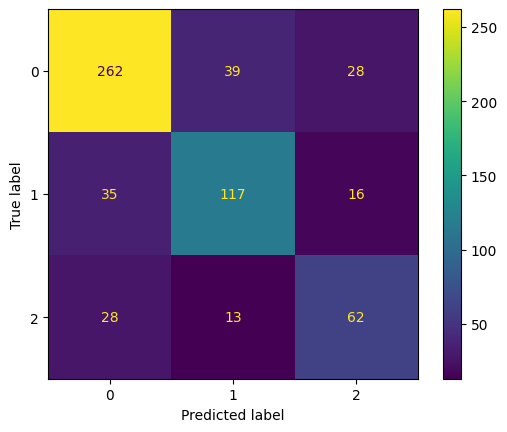

######################################
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       329
           1       0.68      0.64      0.66       168
           2       0.58      0.58      0.58       103

    accuracy                           0.71       600
   macro avg       0.68      0.67      0.67       600
weighted avg       0.71      0.71      0.71       600



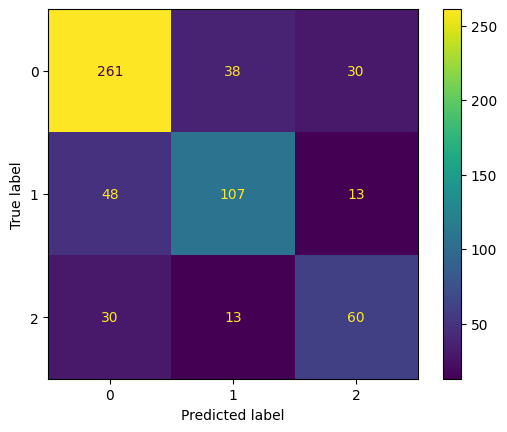

######################################
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       329
           1       0.69      0.73      0.71       168
           2       0.67      0.60      0.64       103

    accuracy                           0.76       600
   macro avg       0.73      0.72      0.72       600
weighted avg       0.76      0.76      0.76       600



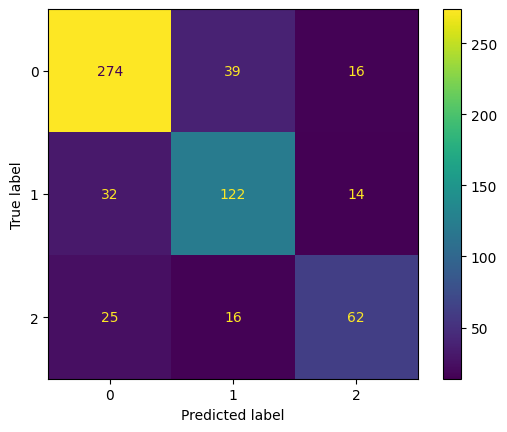

######################################
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       329
           1       0.79      0.75      0.77       168
           2       0.59      0.63      0.61       103

    accuracy                           0.78       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.78      0.78      0.78       600



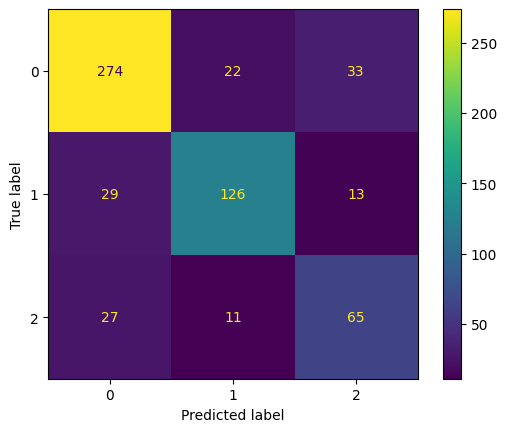

######################################
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       329
           1       0.64      0.61      0.62       168
           2       0.53      0.61      0.57       103

    accuracy                           0.69       600
   macro avg       0.65      0.66      0.65       600
weighted avg       0.69      0.69      0.69       600



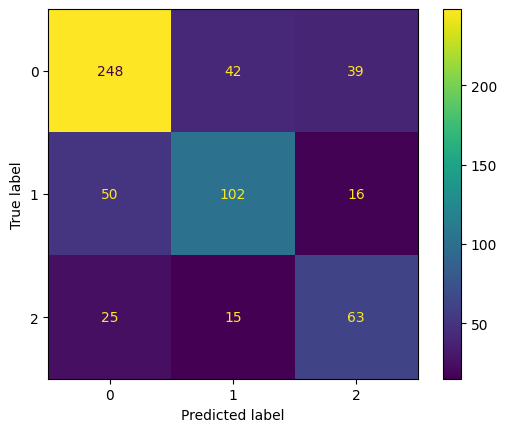

######################################
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       329
           1       0.70      0.70      0.70       168
           2       0.60      0.65      0.62       103

    accuracy                           0.75       600
   macro avg       0.71      0.72      0.71       600
weighted avg       0.75      0.75      0.75       600



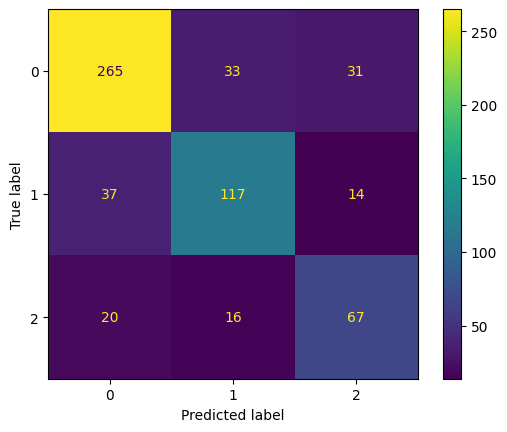

######################################
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       329
           1       0.65      0.67      0.66       168
           2       0.58      0.57      0.58       103

    accuracy                           0.72       600
   macro avg       0.68      0.68      0.68       600
weighted avg       0.72      0.72      0.72       600



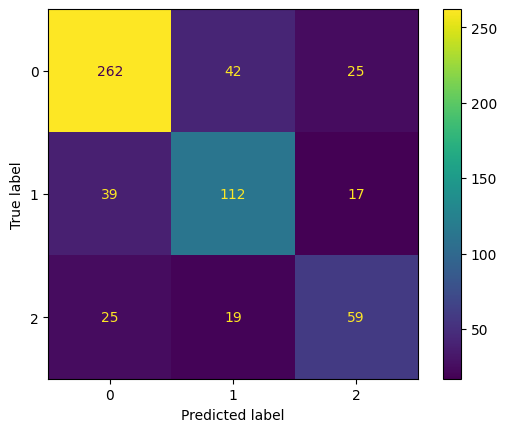

######################################
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       329
           1       0.64      0.68      0.66       168
           2       0.51      0.57      0.54       103

    accuracy                           0.72       600
   macro avg       0.67      0.68      0.67       600
weighted avg       0.73      0.72      0.72       600



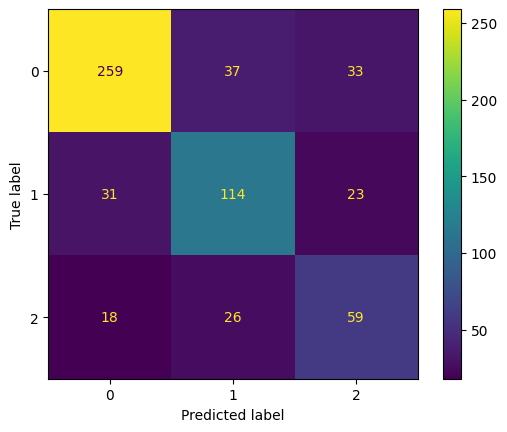

######################################
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       329
           1       0.70      0.67      0.68       168
           2       0.62      0.63      0.62       103

    accuracy                           0.75       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.75      0.75      0.75       600



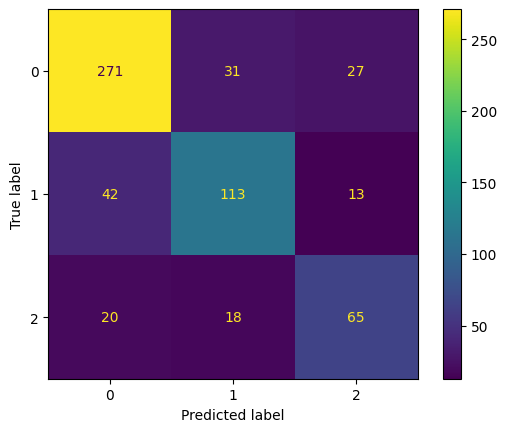

######################################
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       329
           1       0.70      0.68      0.69       168
           2       0.62      0.61      0.62       103

    accuracy                           0.74       600
   macro avg       0.71      0.70      0.70       600
weighted avg       0.74      0.74      0.74       600



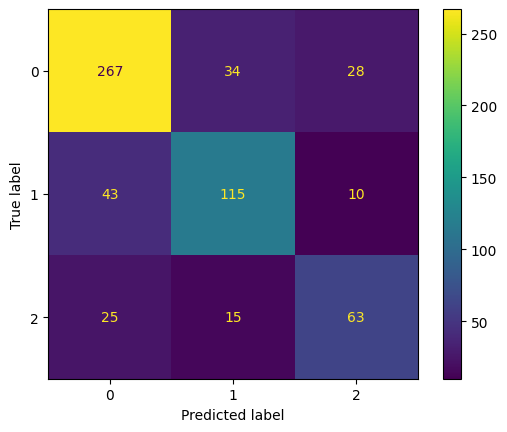

######################################


In [ ]:
import random
preds = []
clfs=[]

for i in range(0,10):
  seed = np.random.randint(0,200)
  #clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=2000, random_state=seed))
  clfs.append(DecisionTreeClassifier(random_state=seed))

for model in clfs:

  num_cols = X_train.shape[1]

  # Generate a random permutation of the column indices
  perm = np.random.permutation(num_cols)

  # Reorder the columns based on the permutation
  X_train_ = X_train[:, perm]
  X_test_ = X_test[:, perm]

  #Seleciona parte das caracteristicas
  X_train_ = X_train_[:,:35]
  X_test_ = X_test_[:,:35]



  model.fit(X_train_, y_train)
  preds.append(model.predict(X_test_) )
  #print(accuracy_score(y_test,preds[-1]))
  print(classification_report(y_test,preds[-1]))
  cm = confusion_matrix(y_test, preds[-1], labels=model.classes_)


  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
  disp.plot()

  plt.show()
  print("######################################")

##Fusão: Voto Majoritário

(10, 600)
[2 0 0 0 0 2 2 2 1 2] 0
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       329
           1       0.89      0.81      0.85       168
           2       0.93      0.75      0.83       103

    accuracy                           0.88       600
   macro avg       0.89      0.84      0.86       600
weighted avg       0.88      0.88      0.87       600



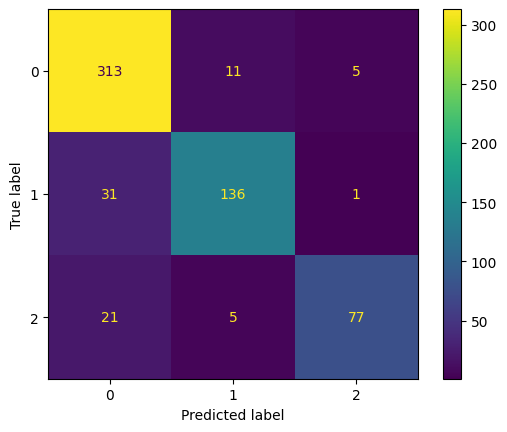

######################################


In [ ]:
preds = np.array(preds)
y_pred = []
print(preds.shape)
print(preds[:,50],y_test[50])

for i in range(preds.shape[1]):
  p = preds[:,i]
  classes, votes = np.unique(p, return_counts=True)
  #print(classes,votes)
  # Encontrar o índice do valor com a contagem mais alta
  idx_max = np.argmax(votes)

  # Obter o valor com a contagem mais alta
  majority_vote = classes[idx_max]

  #print(p,valor_mais_alto)

  y_pred.append(majority_vote)

y_pred = np.array(y_pred)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=model.classes_)
disp.plot()

plt.show()
print("######################################")

#SKLEARN: BaggingClassifier()

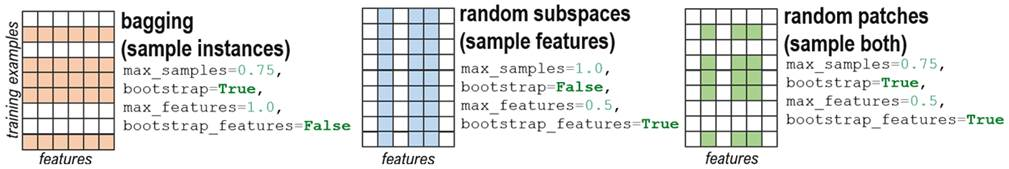

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       329
           1       0.91      0.75      0.82       168
           2       0.91      0.72      0.80       103

    accuracy                           0.86       600
   macro avg       0.88      0.81      0.84       600
weighted avg       0.87      0.86      0.86       600



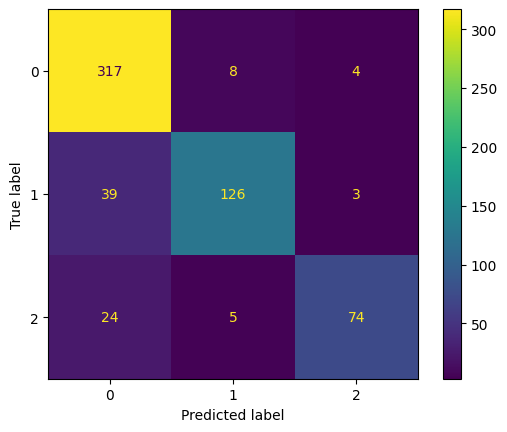

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

#clf = MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=2000)
clf = DecisionTreeClassifier()

#RandomSubspace
bagging_clf = BaggingClassifier(estimator= clf,
                        n_estimators=10, random_state=0,
                        max_features=0.7,bootstrap_features=True,
                        max_samples=1.0,bootstrap=False)

bagging_clf.fit(X_train,y_train)
y_pred = bagging_clf.predict(X_test)

print(classification_report(y_test,y_pred))


cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=model.classes_)
disp.plot()

plt.show()

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       329
           1       0.87      0.87      0.87       168
           2       0.95      0.69      0.80       103

    accuracy                           0.89       600
   macro avg       0.90      0.84      0.87       600
weighted avg       0.90      0.89      0.89       600



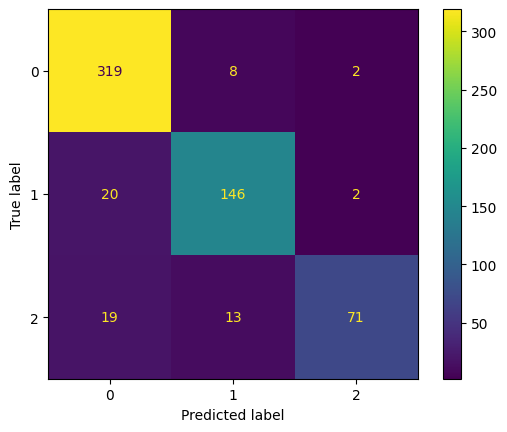

In [ ]:
#Bagging
bagging_clf = BaggingClassifier(estimator= clf,
                        n_estimators=10, random_state=0,
                        max_features=1.0,bootstrap_features=False,
                        max_samples=0.7,bootstrap=True)

bagging_clf.fit(X_train,y_train)
y_pred = bagging_clf.predict(X_test)

print(classification_report(y_test,y_pred))


cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=model.classes_)
disp.plot()

plt.show()

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       329
           1       0.86      0.73      0.79       168
           2       0.81      0.55      0.66       103

    accuracy                           0.82       600
   macro avg       0.83      0.74      0.77       600
weighted avg       0.82      0.82      0.81       600



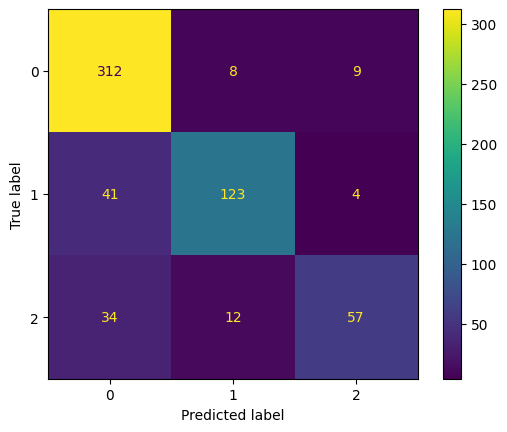

In [ ]:
#Bagging + Random Subspaces
bagging_clf = BaggingClassifier(estimator= clf,
                        n_estimators=10, random_state=0,
                        max_features=0.7,bootstrap_features=True,
                        max_samples=0.7,bootstrap=True)

bagging_clf.fit(X_train,y_train)
y_pred = bagging_clf.predict(X_test)

print(classification_report(y_test,y_pred))


cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=model.classes_)
disp.plot()

plt.show()

#Boosting
## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


#Boosting of dt´s
ada_clf = AdaBoostClassifier(estimator=dt, n_estimators=50)
ada_clf.fit(X_train,y_train)
y_pred = ada_clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.725
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       329
           1       0.73      0.61      0.66       168
           2       0.59      0.54      0.57       103

    accuracy                           0.73       600
   macro avg       0.69      0.66      0.68       600
weighted avg       0.72      0.72      0.72       600

0.8883333333333333
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       329
           1       0.88      0.82      0.85       168
           2       0.93      0.81      0.86       103

    accuracy                           0.89       600
   macro avg       0.90      0.86      0.88       600
weighted avg       0.89      0.89      0.89       600



In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



0.925
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       329
           1       0.93      0.89      0.91       168
           2       0.96      0.79      0.87       103

    accuracy                           0.93       600
   macro avg       0.94      0.89      0.91       600
weighted avg       0.93      0.93      0.92       600

